In [25]:
# Imports
import lutorpy as lua
import numpy as np
from skimage import io
from utils.img_processing import process_img
from utils.face_dlib import AlignDlib
from utils.Classifier import HotOrNotTorchRegression

%matplotlib inline

In [26]:
# define face model
fdet = AlignDlib()
# define scoring model
net = HotOrNotTorchRegression(gpu_mode=1,model_path='trained/', model_file='model_best.t7', image_size=224)

model_best.t7


In [27]:
# score function
def score_image(img):
    # find all faces
    dets = fdet.getAllFaceBoundingBoxes(img)
    # if there is only one match, go and score
    if len(dets) != 0:
        det = dets[0]
        img2, face_img = process_img(img, fdet, size=224, is_shortest=True,
                                    margins={'width':0.5, "bottom":0.5, "top":0.5},
                                    bbox={'x1':int(np.round(det.left())),
                                           'x2':int(np.round(det.right())),
                                           'y1':int(np.round(det.top())),
                                           'y2':int(np.round(det.bottom()))})
        score =  net.classify_image(img2)[1]
        return img2, score
    else:
        return None, None

Score --  9.68248


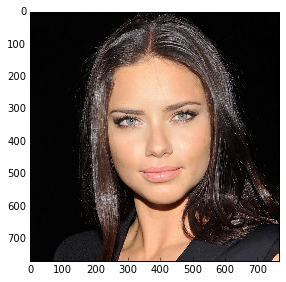

In [28]:
# read an example image from web
img_url = "https://s-media-cache-ak0.pinimg.com/originals/9a/3b/65/9a3b65c368c712ca322394ee4d19d407.jpg"
img = io.imread(img_url)
score = score_image(img)[1]

# show results
print "Score -- ", score
io.imshow(img)

Score --  5.14069


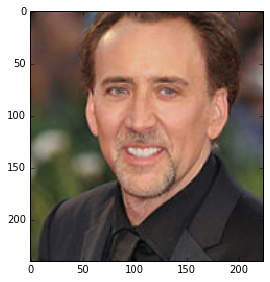

In [29]:
# read an example image from web
img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Nicolas_Cage_-_66%C3%A8me_Festival_de_Venise_(Mostra).jpg/220px-Nicolas_Cage_-_66%C3%A8me_Festival_de_Venise_(Mostra).jpg"
img = io.imread(img_url)
processed_img,score = score_image(img)

# show results
print "Score -- ", score
io.imshow(processed_img)